In [3]:
import cv2
import numpy as np
import os
from skimage.feature import local_binary_pattern


In [4]:
# Set LBP parameters
radius = 3
n_points = 2 * radius
method = 'uniform'
n_bins = n_points + 2


In [5]:
# Set directory paths for train and test images
test_dir =r'F:\for Drishti dataset\DRISHTI-gs_Nayab\Test-20211018T060000Z-001'
train_dir = r'F:\for Drishti dataset\DRISHTI-gs_Nayab\Training-20211018T055246Z-001'


In [6]:
# Initialize empty feature and label matrices for train and test sets
train_features = np.empty((0, n_bins))
train_labels = []
test_features = np.empty((0, n_bins))
test_labels = []

In [7]:
# Loop through train images and extract LBP features and labels
for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
             # Read image and extract green channel
            img = cv2.imread(os.path.join(root, file))
            b, g, r = cv2.split(img)
            gray = g
                      
            # Compute LBP features and histogram
            lbp = local_binary_pattern(gray, n_points, radius, method)
            hist, _ = np.histogram(lbp, bins=np.arange(n_bins+1), density=True)
            # Append features and label to train set
            train_features = np.vstack((train_features, hist))
            X_label = os.path.basename(root)
            train_labels.append(X_label)


In [8]:
# Loop through test images and extract LBP features and labels
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            # Read image and extract green channel
            img = cv2.imread(os.path.join(root, file))
            b, g, r = cv2.split(img)
            gray = g

            # Compute LBP features and histogram
            lbp = local_binary_pattern(gray, n_points, radius, method)
            hist, _ = np.histogram(lbp, bins=np.arange(n_bins+1), density=True)
            # Append features and label to train set
            test_features = np.vstack((test_features, hist))
            Y_label = os.path.basename(root)
            test_labels.append(Y_label)

In [9]:
# Save feature and label matrices into CSV files
np.savetxt('train_features.csv', train_features, delimiter=',')
np.savetxt('train_labels.csv', train_labels, delimiter=',', fmt='%s')
np.savetxt('test_features.csv', test_features, delimiter=',')
np.savetxt('test_labels.csv', test_labels, delimiter=',', fmt='%s')


In [10]:
#merging
merge_dir =r'F:\for Drishti dataset\Merged'
# Set LBP parameters
radius = 3
n_points = 2 * radius
method = 'uniform'
n_bins = n_points + 2

merge_features = np.empty((0, n_points + 2))
merge_labels = []

# Loop through train images and extract LBP features and labels
for root, dirs, files in os.walk(merge_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
             # Read image and extract green channel
            img = cv2.imread(os.path.join(root, file))
            b, g, r = cv2.split(img)
            gray = g
                      
            # Compute LBP features and histogram
            lbp = local_binary_pattern(gray, n_points, radius, method)
            hist, _ = np.histogram(lbp, bins=np.arange(n_bins+1), density=True)
            # Append features and label to train set
            merge_features = np.vstack((merge_features, hist))
            X_label = os.path.basename(root)
            merge_labels.append(X_label)

# Save feature and label matrices into CSV files
np.savetxt('merge_features.csv', merge_features, delimiter=',')
np.savetxt('merge_labels.csv', merge_labels, delimiter=',', fmt='%s')


In [11]:
# Calculate mean and standard deviation of train feature matrix
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
# Calculate mean and standard deviation of train feature matrix
test_mean = np.mean(test_features, axis=0)
test_std = np.std(test_features, axis=0)

print('Test Features Mean:', test_mean)
print('Test Features Standard Deviation:', test_std)

print('Train Features Mean:', train_mean)
print('Train Features Standard Deviation:', train_std)

# Print the shape of the feature matrix and length of label list for train and test sets
print('Train Features Shape:', train_features.shape)
print('Train Labels Length:', len(train_labels))
print('Test Features Shape:', test_features.shape)
print('Test Labels Length:', len(test_labels))


Test Features Mean: [0.04221121 0.04023533 0.02154713 0.02457458 0.02424667 0.04224822
 0.73469384 0.07024301]
Test Features Standard Deviation: [0.06041409 0.0574861  0.0308353  0.03468892 0.03345406 0.05936816
 0.37460501 0.10050739]
Train Features Mean: [0.04191993 0.04053383 0.02271508 0.02641212 0.02546206 0.04260777
 0.73036079 0.06998843]
Train Features Standard Deviation: [0.0594834  0.05735    0.03235591 0.03742064 0.03505236 0.05934205
 0.37717961 0.09926041]
Train Features Shape: (150, 8)
Train Labels Length: 150
Test Features Shape: (152, 8)
Test Labels Length: 152


In [12]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc, \
    f1_score, precision_score, recall_score,precision_recall_curve, PrecisionRecallDisplay,\
    classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Load train and test feature matrices and label lists from CSV files
train_features = np.loadtxt('train_features.csv', delimiter=',')
train_labels = np.loadtxt('train_labels.csv', delimiter=',', dtype=str)
test_features = np.loadtxt('test_features.csv', delimiter=',')
test_labels = np.loadtxt('test_labels.csv', delimiter=',', dtype=str)
merge_features = np.loadtxt('merge_features.csv', delimiter=',')
merge_labels = np.loadtxt('merge_features.csv', delimiter=',', dtype=str)
train_labels = np.where(train_labels == 'glaucoma', 0, 1)
test_labels = np.where(test_labels == 'glaucoma', 0, 1)

#train_labels = np.where(train_labels == 'NORMAL', 1, 1)
#test_labels = np.where(test_labels == 'NORMAL', 1, 1)
print('train_labels', merge_labels)
print('train_labels', train_labels)
print('test_labels', test_labels)



train_labels [['1.343704036931834822e-01' '1.228346404020961014e-01'
  '6.026313068262742489e-02' '6.630416029437546932e-02'
  '6.585402359496728142e-02' '1.251915171390593495e-01'
  '2.065338665850567357e-01' '2.186482576086341556e-01']
 ['1.418732067298567601e-01' '1.259020776813924158e-01'
  '4.760078596867289846e-02' '3.983962443201482378e-02'
  '4.984621138538142954e-02' '1.261730917372810290e-01'
  '2.309838005604492595e-01' '2.377812015049513839e-01']
 ['1.326099315322441241e-01' '1.255784682474637426e-01'
  '6.000267172275849242e-02' '5.884622124808334270e-02'
  '6.253053248656570418e-02' '1.253662856915915558e-01'
  '2.162701250571767986e-01' '2.187957640141162396e-01']
 ['1.103677827394554251e-01' '1.183160690217924249e-01'
  '8.448931928257132074e-02' '1.006293593563815925e-01'
  '9.244619201858662871e-02' '1.303479064841020496e-01'
  '1.732787899637097673e-01' '1.901245811334008051e-01']
 ['1.284620958359728726e-01' '1.225557000038603878e-01'
  '6.383751037653238869e-02' '6

In [14]:
#  Normalize train and test feature matrices
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)
np.random.seed(42)
print(test_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [15]:
#Train SVM classifier on train set
clf = svm.SVC(kernel='linear', C=0.9, gamma=0.5, probability=True) # set probability to True to get class probabilities
clf.fit(train_features, train_labels)


SVC(C=0.9, gamma=0.5, kernel='linear', probability=True)

In [16]:
import time
clf= KNeighborsClassifier(n_neighbors=27, metric='minkowski', p=2 )
start_time= time.time() 
clf.fit(train_features, train_labels)
end_time=time.time()
trainig_time= end_time-start_time
#print("Trainig_Time : ",trainig_time)

In [17]:
from sklearn.tree import DecisionTreeClassifier  
clf= DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=0.25) 
start_time= time.time() 
clf.fit(train_features, train_labels)
end_time=time.time()
trainig_time= end_time-start_time
print("Trainig_Time : ",trainig_time)

Trainig_Time :  0.004995107650756836


In [18]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_estimators=14, criterion="entropy",random_state=5)  
start_time= time.time() 
clf.fit(train_features, train_labels)
end_time=time.time()
trainig_time= end_time-start_time
print("Trainig_Time : ",trainig_time)

Trainig_Time :  0.15390372276306152


In [19]:
from sklearn.ensemble import BaggingClassifier
clf= BaggingClassifier(n_estimators=10,  random_state=5)  
start_time= time.time() 
clf.fit(train_features, train_labels)
end_time=time.time()
trainig_time= end_time-start_time
print("Trainig_Time : ",trainig_time)

Trainig_Time :  0.10993146896362305


In [20]:
# Predict probabilities for test set
#print(pred_labels)
start_time= time.time() 
prob_labels = clf.predict_proba(test_features)
end_time=time.time()
testing_time= end_time-start_time
print("Testing_Time : ",testing_time)
#print( prob_labels)
threshold = 0.65 # lower threshold to increase sensitivity
pred_labels = np.where(prob_labels[:, 0] > threshold, 0, 1)

print(pred_labels)
#print (prob_labels)

Testing_Time :  0.009993791580200195
[0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0
 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [21]:
# Calculate accuracy on test set
accuracy = accuracy_score(test_labels, pred_labels)

print('Test Accuracy:',100* accuracy)


Test Accuracy: 85.52631578947368


In [22]:
# Calculate ROC curve and AUC score
print(test_labels)
fpr, tpr, _ = roc_curve(test_labels, prob_labels[:,1])
roc_auc = auc(tpr, fpr)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


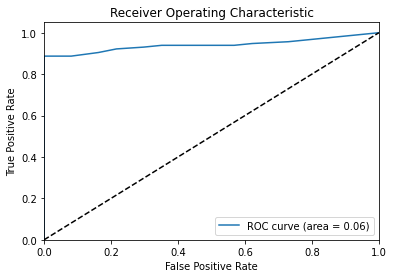

In [23]:
#Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [24]:
# Calculate f1 score, precision, and recall
f1 = f1_score(test_labels, pred_labels)
precision = precision_score(test_labels, pred_labels)
recall = recall_score(test_labels, pred_labels)

print('f1 score:', f1)
print('precision:', precision)
print('recall:', recall)


f1 score: 0.907563025210084
precision: 0.8780487804878049
recall: 0.9391304347826087


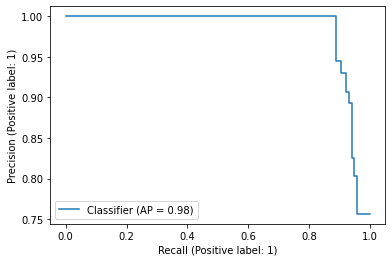

In [25]:
PrecisionRecallDisplay.from_predictions(test_labels, prob_labels[:,1])
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


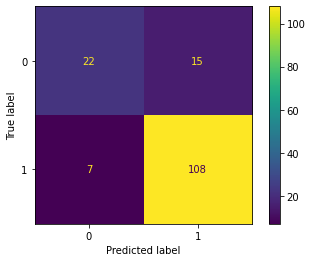

In [26]:
#confusion matrix
labels = ['Glaucoma', 'Normal']
print(test_labels)
cm = confusion_matrix(test_labels, pred_labels)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
#plt.show()

In [27]:
#classification report
t_names = ['Glaucoma', 'Normal']
print(classification_report(test_labels, pred_labels, target_names=t_names))

              precision    recall  f1-score   support

    Glaucoma       0.76      0.59      0.67        37
      Normal       0.88      0.94      0.91       115

    accuracy                           0.86       152
   macro avg       0.82      0.77      0.79       152
weighted avg       0.85      0.86      0.85       152



In [35]:
import os
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.preprocessing import LabelEncoder

features = np.loadtxt('merge_features.csv', delimiter=',', dtype=float)
labels = np.loadtxt('merge_labels.csv', delimiter=',', dtype=str)

# Encode the labels as numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Create a classifier

clf= DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=0.25) 
#clf= BaggingClassifier(n_estimators=10,  random_state=5)
#clf = svm.SVC(kernel='linear', C=0.9, gamma=0.5, probability=True)#0.69
#clf=KNeighborsClassifier(n_neighbors=27, metric='minkowski', p=2 ) #0.62

#clf= RandomForestClassifier(n_estimators=14, criterion="entropy",random_state=5)  

# Create a KFold object
k_folds = KFold(n_splits=10)

# List to store cross-validation scores
scores = []
testing_times = []
# Perform cross-validation
for train_index, test_index in k_folds.split(features):
    # Split the data into training and testing sets
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels_encoded[train_index], labels_encoded[test_index]

    # Train the classifier
    clf.fit(X_train, y_train)
# Predict labels for test instances and measure testing time
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    testing_time = end_time - start_time
    testing_times.append(testing_time)
    # Evaluate the classifier
    score = clf.score(X_test, y_test)
    scores.append(score)

# Print the cross-validation scores
print("Cross Validation Scores:", scores)
print("Average CV Score:", np.mean(scores))
print("Number of CV Scores used in Average:", len(scores))
# Print the testing times
print("Testing Times:", testing_times)

Cross Validation Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.0, 0.0, 0.0]
Average CV Score: 0.6900000000000001
Number of CV Scores used in Average: 10
Testing Times: [0.0009992122650146484, 0.0010004043579101562, 0.0009980201721191406, 0.00099945068359375, 0.0, 0.0, 0.0, 0.0, 0.0009996891021728516, 0.0009992122650146484]
